In [1]:
import pandas as pd
import numpy as np

# Scatter-plot

Un scatter plot (o gráfico de puntos) es un tipo de gráfico que usa puntos para representar los valores de dos o más variables numéricas diferentes.  En un scatter plot la posición de cada punto en los ejes horizontales y verticales indica los valores que toma un individio en particular.

## ¿Cuándo deberiamos usar un scatter plot?

Si bien los scatter-plot grafican los valores de dos (o más) variables numéricas para cada sujeto/individuo en nuestra base de datos, la información que nos da el scatter-plot se obtiene al mirar a los puntos en conjunto.

Usando los scatter-plots podemos aprender sobre
1. Relaciones en los datos
2. Patrones en los datos como:
  * Clusters
  * Outliers
  * Brechas en los datos 

## Relaciones en los datos

* Al usar un scatter plot nos podemos dar cuenta de relaciones lineales (no lineales) entre dos variables numéricas.
* Procedemos a generar datos simulados para estudiar el tipo de dependencias que podemos observar en un scatter-plot.

Veamos algunos ejemplos. Primero con una dependencia lineal fuerte y otra moderada.

In [2]:
np.random.seed(2021)

# Generamos datos simulados
n = 100
x = np.random.normal(3, 1, 100)

# Dependencia lineal positiva fuerte 
y1 = 3*x + np.random.normal(0, 1, 100) + 2

# Dependencia lineal positiva moderada 
y2 = 3*x + np.random.normal(0, 4, 100) + 6

tipo = np.concatenate((np.repeat("Fuerte", n),np.repeat("Moderada", n)))
df = pd.DataFrame({"x": np.concatenate((x, x)), "y": np.concatenate((y1, y2)), "Tipo": tipo})

In [3]:
df

,x,y,Tipo
0,4.488609,14.725253,Fuerte
1,3.676011,13.486266,Fuerte
2,2.581549,11.001893,Fuerte
3,2.193479,8.138733,Fuerte
4,3.555876,13.208963,Fuerte
...,...,...,...
195,2.874061,10.115982,Moderada
196,2.567584,13.221356,Moderada
197,3.425937,11.371744,Moderada
198,3.756636,14.379128,Moderada


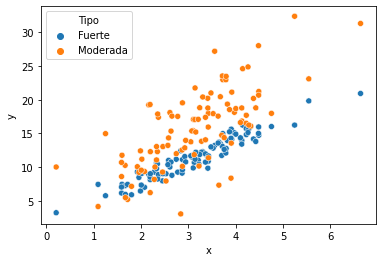

In [4]:
import seaborn as sns

sns.scatterplot(data=df, x="x", y="y", hue="Tipo")

También podemos hacer esto en dos gráficos separados.

Text(0.5, 0.98, 'Dependencia lineal positiva')

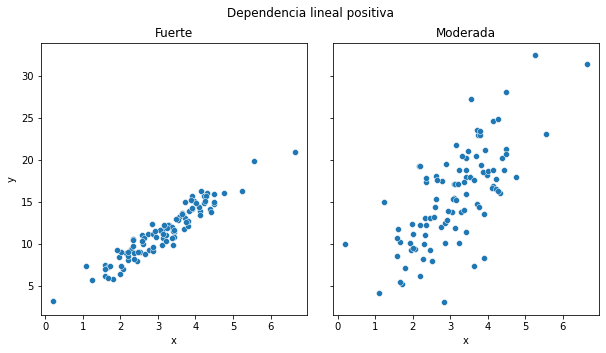

In [5]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(10, 5), sharey="all")

ax1 = axis[0]
ax2 = axis[1]

fig.subplots_adjust(hspace=0.8, wspace=0.1)

sns.scatterplot(ax=ax1, data=df[df["Tipo"] == "Fuerte"], x="x", y="y")
ax1.set_title('Fuerte')

sns.scatterplot(ax=ax2, data=df[df["Tipo"] == "Moderada"], x="x", y="y",)
ax2.set_title('Moderada')

fig.suptitle('Dependencia lineal positiva', size='12')

Ahora con una dependencia lineal negativa.

Text(0.5, 0.98, 'Dependencia lineal negativa')

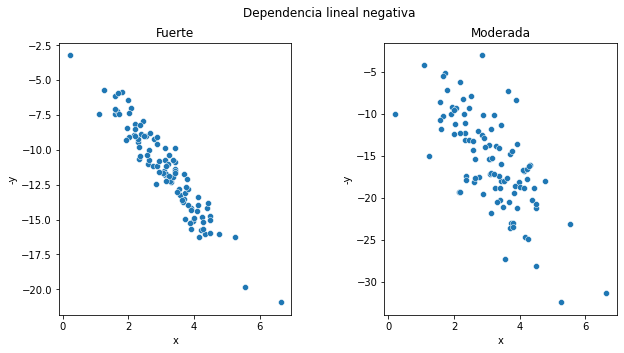

In [6]:
df["-y"] = -df["y"]

fig, axis = plt.subplots(1, 2, figsize=(10, 5))

ax1 = axis[0]
ax2 = axis[1]

fig.subplots_adjust(hspace=0.8, wspace=0.4)

sns.scatterplot(ax=ax1,data=df[df["Tipo"] == "Fuerte"], x="x", y="-y")
ax1.set_title('Fuerte')

sns.scatterplot(ax=ax2,data=df[df["Tipo"] == "Moderada"], x="x", y="-y")
ax2.set_title('Moderada')

fig.suptitle('Dependencia lineal negativa', size='12')

Y finalmente, podemos ver una relación no lineal.

In [7]:
np.random.seed(2021)

x = np.random.normal(3, 2, 100)

# Dependencia no lineal fuerte 
y1 = (x-3)**2 + np.random.normal(0, 1, 100)

# Dependencia no lineal moderada 
y2 = np.sin(4*x) + 20 + np.random.uniform(-0.5, 0.8, 100)

tipo = np.concatenate((np.repeat("Fuerte", n), np.repeat("Moderada", n)))
df = pd.DataFrame({"x": np.concatenate((x, x)),"y": np.concatenate((y1, y2)),"Tipo": tipo})

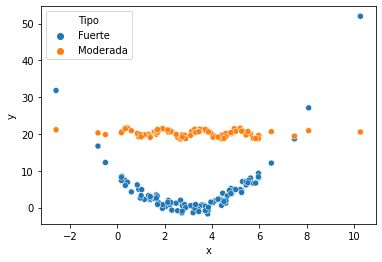

In [8]:
sns.scatterplot(data=df, x="x", y="y", hue="Tipo")

O podemos ver como esto en gráficos separados.

Text(0.5, 0.98, 'Dependencia no lineal')

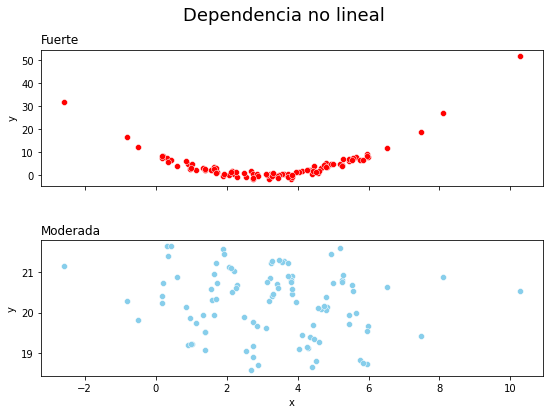

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 6), sharex='all')
fig.subplots_adjust(hspace=0.4, wspace=0.4)

sns.scatterplot(ax=ax1, data=df[df["Tipo"] == "Fuerte"], x="x", y="y", color="red")
ax1.set_title('Fuerte', loc="left")

sns.scatterplot(ax=ax2, data=df[df["Tipo"] == "Moderada"], x="x", y="y", color="skyblue")
ax2.set_title('Moderada', loc="left")

fig.suptitle('Dependencia no lineal', size = '18')

Y ahora un scatter plot con dos variables sin relación.

In [10]:
# Generamos variables "x"
x = np.random.normal(3, 1, 100)

# Usando las variables "x", generamos variables "y"
y = np.random.normal(0, 3.5, 100) + 6
df = pd.DataFrame({"x": x, "y": y})

Text(0.5, 0.98, 'Sin relación')

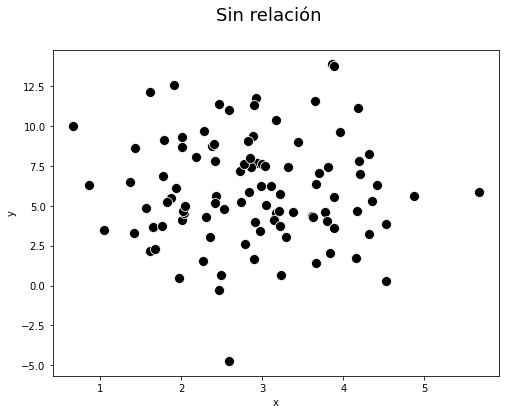

In [11]:
#El siguiente gráfico muestra una relación nula o sin relación
fig, ax1 = plt.subplots(figsize=(8, 6))
sns.scatterplot(ax=ax1, data=df, x="x", y="y",color="black", s=100)
fig.suptitle('Sin relación', size='18')

## Patrones en los datos

Partimos generando datos simulados que nos servirán para ejemplificar los tipos de patrones que podemos observar usando scatter-plots.

In [12]:
np.random.seed(2021)

# Eje x
x1 = np.random.normal(3, 1, 100)
x2 = np.concatenate((np.random.normal(1, 2, 100), [-3]))

#Eje y
y1 = -3*x1+np.random.normal(0, 3, 100)
y2 = 6*x2[0:100] + np.random.normal(0, 3, 100)
y2 = np.concatenate((y2, [30]))

tipo = np.concatenate((np.repeat("Grupo 1", n), np.repeat("Grupo 2", n+1)))
df = pd.DataFrame({"x": np.concatenate((x1, x2)), "y": np.concatenate((y1, y2)),"Tipo": tipo})

**Clusters**

Usando scatter-plots podemos identificar fácilmente "clusters" o grupos en los datos.  Un cluster es un grupo de observaciones tal que:

* Todos los elementos dentro de un cluster tiene un comportamiento similar.
* Elementos pertenecientes a clusters distintos se comportan de manera distinta.

Text(0.5, 0.98, 'Clusters')

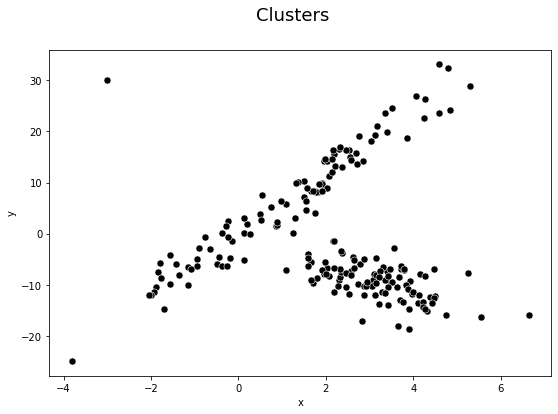

In [13]:
fig, ax1 = plt.subplots(figsize=(9, 6))
sns.scatterplot(ax=ax1, data=df, x="x", y="y", color="black", s=50)
fig.suptitle('Clusters', size='18')

**Outliers**

Usando este tipo de gráfico, también podemos detectar outliers o observaciones atípicas. Por ejemplo, podemos observar una observación atípica para el grupo 2 en el cuadrante superior izquierdo.

Text(0.5, 0.98, 'Cluster')

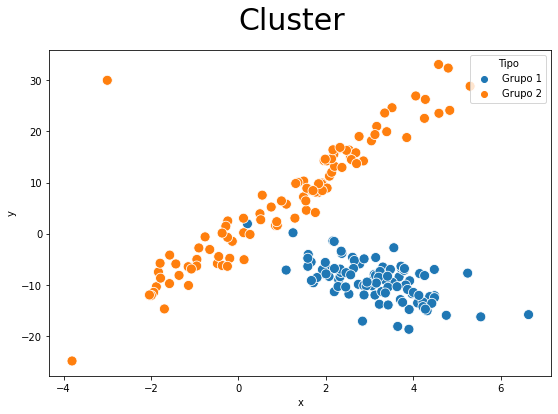

In [14]:
fig, ax1 = plt.subplots(figsize=(9, 6))
sns.scatterplot(ax=ax1, data=df, x="x", y="y", hue="Tipo", s=100)
fig.suptitle('Cluster', size='30')

**Brechas en los datos**

Las brechas en los datos o "gaps" ocurren cuando para una variable númerica no se observan valores en uno o más intervalos determinados 

In [15]:
np.random.seed(2021)

# Eje x
x1 = np.random.uniform(1, 3.5, 50)
x2 = np.random.uniform(4, 8, 50)
x = np.concatenate((x1, x2))

# Eje y
y = -3*x**2 + np.random.normal(0, 10, 100) + 2

df = pd.DataFrame({"x": x,"y": y})

Text(0.5, 0.98, 'Brechas en los datos')

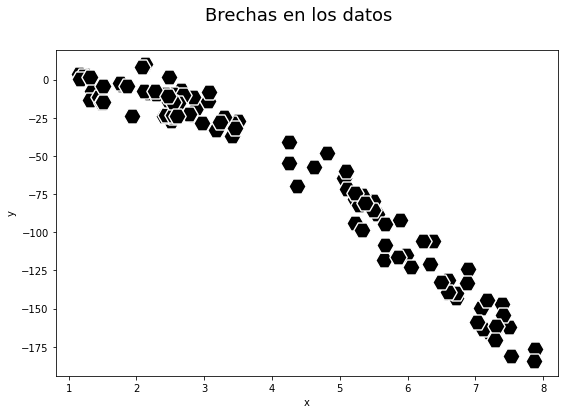

In [16]:
fig, ax1 = plt.subplots(figsize=(9, 6))

# marker H nos muestra un hexágono
sns.scatterplot(ax=ax1, data=df, x="x", y="y", marker="H", s=300, color="black")
fig.suptitle('Brechas en los datos', size='18')

## Cómo crear scatter plots

Empezamos cargando los datos que ocuparemos:


  Número |Nombre  | Descripción 
---------|--------|------------------
 1       |mpg     | Miles/(US) gallon
 2       |cyl     | Number of cylinders
 3       |disp    | Displacement (cu.in.)
 4       |hp      | Gross horsepower
 5       |drat    | Rear axle ratio
 6       |wt      | Weight (1000 lbs)
 7       |qsec    | 1/4 mile time
 8       |vs      | Engine (0 = V-shaped, 1 = straight)
 9       |am      |Transmission (0 = automatic, 1 = manual)
 10      |gear    | Number of forward gears
 11      |carb    |Number of carburetors

Para esto tenemos que instalar pydataset

In [17]:
# Recordemos instalar pydataset
!pip install pydataset

     |████████████████████████████████| 15.9 MB 104 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939430 sha256=0cf605a60b0eac31e52cfcdc5fe35ac7a2f1467c9a88b795b7908571d8d4790c
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [18]:
from pydataset import data

mtcars = data("mtcars")
mtcars.head()

initiated datasets repo at: /root/.pydataset/


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [19]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Para graficar un scatter-plot utilizaremos la función **scatterplot()** perteneciente a la librería de visualización ``seaborn``. Para poder realizar la visualización es necesario pasar al menos los siguientes 3 parametros:

1. `x`: El nombre de la lista o valores de la columna que se posicionará en el eje x.
2. `y`: El nombre de la lista o valores de la columna que se posicionará en el eje y.
3. `data`: El nombre del dataset.

Con los siguientes comandos usted podrá ir mejorando la visualización de su scatterplot.

4. `color`: cambia el color del scatterplot. ej: color='g'(pinta los puntos de color verde).

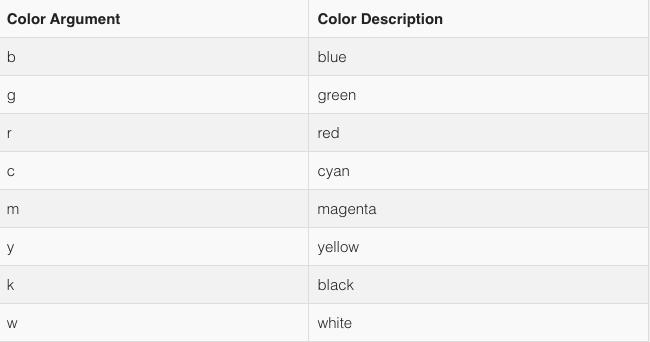

5. `alpha`: transparencia de los puntos.
6. `s`: tamaño del markers.
7. `maker`: cambia la forma de los puntos. Por ejemplo, `marker='v'` graficará triangulos en vez de puntos.

La librería de Matplotlib tiene varios makers, para utilizarlos se debe llamar a la siguiente función de makers.

In [20]:
from matplotlib import markers

# Para obtener todas las posibles formas
all_shapes = markers.MarkerStyle.markers.keys()

# Imprimir la lista
all_shapes

dict_keys(['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', ''])

##  **Peso vs Millas/Galón**
Vemos que existe una relación lineal negativa entre el peso del automovil y su eficiencia en términos de Millas/Galón de combustible.

Text(0.5, 0.98, 'Peso vs Millas/Galón')

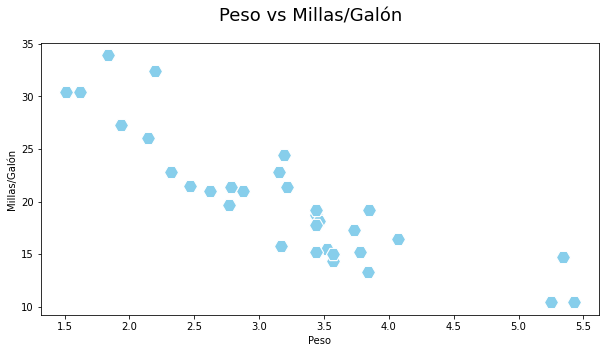

In [21]:
fig, ax1 = plt.subplots(figsize=(10, 5))
sns.scatterplot(ax=ax1, data=mtcars, x="wt", y="mpg", color="skyblue", s=200, marker="H")

ax1.set_xlabel('Peso')
ax1.set_ylabel('Millas/Galón')

fig.suptitle('Peso vs Millas/Galón', size = '18')

## Tercera variable categórica

El argumento `hue` nos sirve para asociar una tercera variable categórica. Esto nos permite introducir nueva información en el scatter plot.

In [22]:
# Pre-procesamos la variable am

mtcars.at[mtcars["am"] == 0, "am"] = "Automatica"
mtcars.at[mtcars["am"] == 1, "am"] = "Manual"
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,Manual,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,Manual,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,Manual,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,Automatica,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,Automatica,3,2


Text(0.5, 0.98, 'Peso vs Millas/Galón')

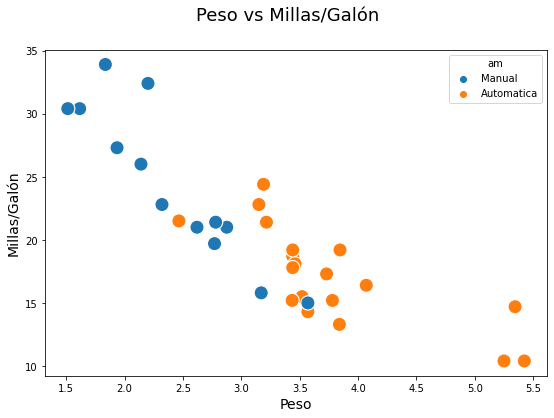

In [23]:
fig, ax1 = plt.subplots(figsize=(9, 6))
sns.scatterplot(ax=ax1, data=mtcars, x="wt", y="mpg",hue="am", s=200, markers=["s", "o"])
ax1.set_xlabel('Peso', size=14)
ax1.set_ylabel('Millas/Galón', size=14)

fig.suptitle('Peso vs Millas/Galón', size = '18')

Otra forma de visualizar esta información es usando la función subplots. Los parametros que se pueden incorporar son

1. `nrows` y `ncols`: numero de filas y columnas de la grilla, por defecto es 1.
2. `sharex` y `sharey`: Controla el intercambio de propiedades entre los ejes x (`sharex`) o y (`sharey`).
    1. **True or all**: eje x o y serán compartidos
    2. **False or none**: cada eje será independiente
    3. **row**: cada fila de los subplot compartirá el eje x o y
    4. **col**: cada columna de los subplot compartirá el eje x o y

3. subplots_adjus(`hspace`: valor de tipo real(opcional) es el alto entre cajas(vertical), `wspace`: valor real(opcional), es el ancho entre cajas(horizontal).

Para indicar que se graficarán 2 figuras se declara `ax1` y `ax2` y a cada una de estas variables se le indica lo que debe graficar, en nuestro ejemplo `ax1` graficará la transmisión de tipo automática y `ax2` graficará la transmisón Manual.

Text(0.5, 0.98, 'Peso vs Millas/Galón')

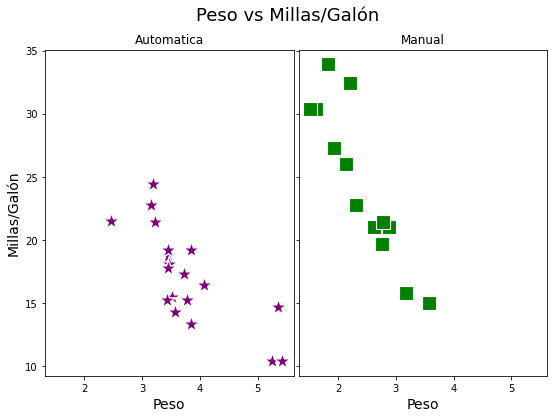

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6), sharey='all', sharex='all')
fig.subplots_adjust(hspace=0.2, wspace=0.02)

sns.scatterplot(
    ax=ax1, data=mtcars[mtcars["am"] == "Automatica"], 
    x="wt", y="mpg", marker="*", s=300, color="purple"
)
ax1.set_title('Automatica')
ax1.set_ylabel('Millas/Galón', size=14)  # Este titulo es común a todo el gráfico
ax1.set_xlabel('Peso', size=14) # Este titulo solo aparece en el gráfico de trasmisión automática


sns.scatterplot(ax=ax2, data=mtcars[mtcars["am"] == "Manual"], x="wt", y="mpg", marker="s", s=200, color="g")
ax2.set_title('Manual') 
ax2.set_xlabel('Peso', size=14) #este titulo solo aparece en el gráfico de trasmisión manual

fig.suptitle('Peso vs Millas/Galón',size = '18') # Título comun para toda la grafica

## Tercera variable numérica

Supongamos que además nos gustaría estudiar el comportamiento de los automóviles por su consumo de combustible. Para esto consideramos la variable

* `mpg`: que nos entrega el número de millas por galón.

Nuevamente, para ello se pueden utilizarar los argumentos
1. `hue`: Lo cual produce puntos con diferentes colores para la variable `mpg`.
2. `size`:Lo cual produce puntos de diferentes tamaños para la variable `mpg`.

Text(0.5, 0.98, 'Peso vs Millas/Galón')

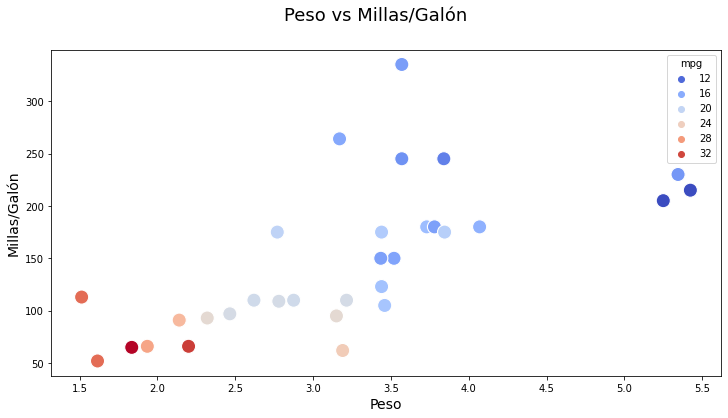

In [32]:
fig, ax1 = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
sns.scatterplot(ax=ax1, data=mtcars, x="wt", y="hp",hue="mpg", s=200, palette="coolwarm")
ax1.set_xlabel('Peso', size=14)
ax1.set_ylabel('Millas/Galón', size=14)
fig.suptitle('Peso vs Millas/Galón', size='18')

En este caso, vamos a agrupar por la variable `mpg`, y vamos a pedir que el tamaño represente el valor.

Text(0.5, 0.98, 'Peso vs HP')

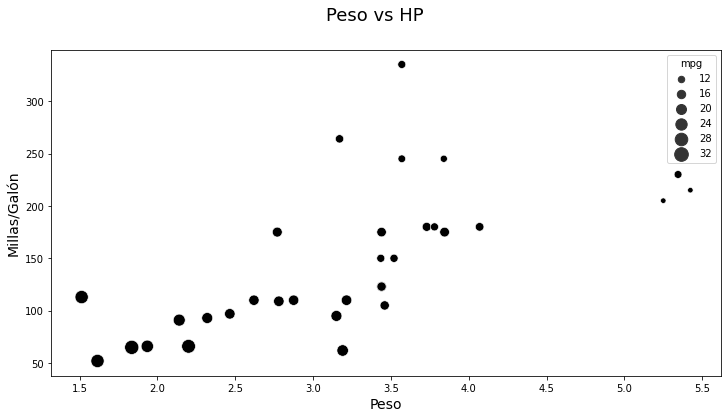

In [26]:
fig, ax1 = plt.subplots(figsize=(12, 6))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
sns.scatterplot(
    ax=ax1, data=mtcars, x="wt", y="hp", 
    marker="o", s=2000, color="black", size="mpg", sizes=(30, 200)
)
ax1.set_xlabel('Peso', size=14)
ax1.set_ylabel('Millas/Galón', size=14)
fig.suptitle('Peso vs HP', size='18')

Ahora vamos a ver 4 variables en el gráfico: `wt` - `hp` - `mpg` - `cyl`. Esto lo haremos utilizando tamaño y color, mediante el argumento `hue`.

Text(0.5, 0.98, 'Peso vs HP')

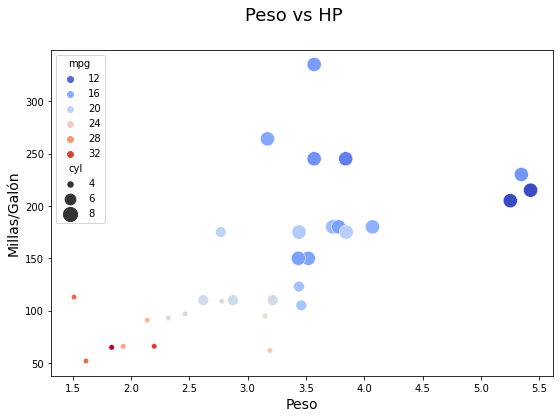

In [27]:
fig, ax1 = plt.subplots(figsize=(9, 6))
fig.subplots_adjust(hspace=0.8, wspace=0.2)

sns.scatterplot(
    ax=ax1, data=mtcars, x="wt", y="hp",hue="mpg", 
    marker="o", s=2000, palette="coolwarm", size="cyl",sizes=(30, 200)
)

ax1.set_xlabel('Peso', size=14)
ax1.set_ylabel('Millas/Galón', size=14)
fig.suptitle('Peso vs HP', size='18')

## Lineplot

Un caso particular del scatter plot es un line plot, en el que graficamos puntos en un gráfico unidos por una línea. Esto es particularmente útil para representar datos a través del tiempo.

Text(0.5, 0.98, 'Peso vs HP')

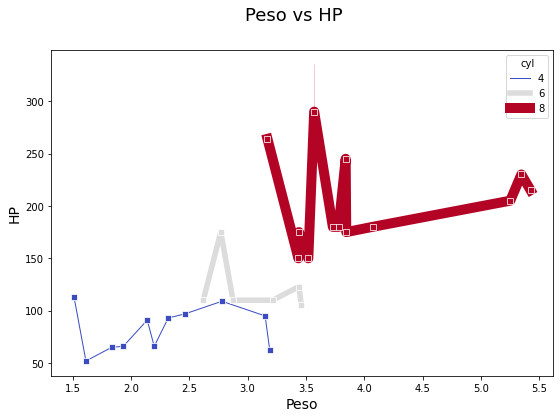

In [28]:
fig, ax1 = plt.subplots(figsize=(9, 6))
fig.subplots_adjust(hspace=0.8, wspace=0.2)

sns.lineplot(
    ax=ax1, data=mtcars, x="wt", y="hp", marker="s",
    hue="cyl", palette="coolwarm", size="cyl", sizes=(1, 10)
)

ax1.set_xlabel('Peso', size=14)
ax1.set_ylabel('HP', size=14)
fig.suptitle('Peso vs HP', size='18')

Text(0.5, 0.98, 'Peso vs HP')

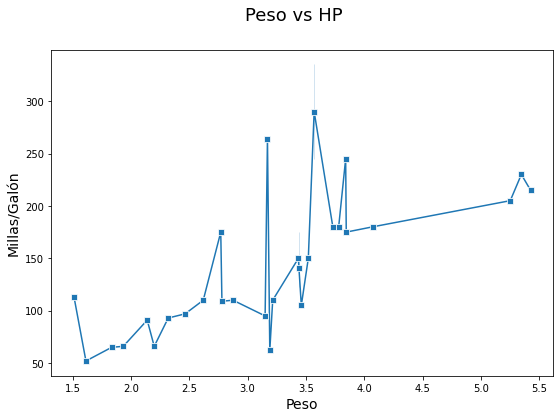

In [29]:
fig, ax1 = plt.subplots(figsize=(9, 6))
fig.subplots_adjust(hspace=0.8, wspace=0.2)

sns.lineplot(ax=ax1, data=mtcars, x="wt", y="hp", marker="s")

ax1.set_xlabel('Peso', size=14)
ax1.set_ylabel('Millas/Galón', size=14)
fig.suptitle('Peso vs HP', size='18')

Note que en los ejemplos de arriba no hace tanto sentido unir los puntos por una linea, ya que cada punto representa un modelo de auto distinto (por lo tanto no podemos esperar una continuidad entre el peso y el número de caballos de fuerza. Sin embargo, **si tenemos una serie de tiempo, si hace sentido este tipo de gráfico**.

In [30]:
air_passengers = data("AirPassengers")
air_passengers.head()

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121


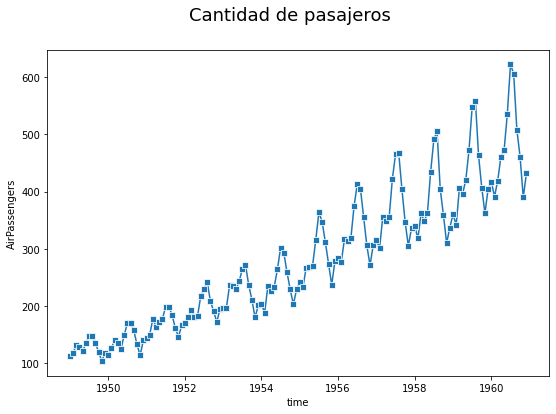

In [31]:
fig, ax1 = plt.subplots(figsize=(9, 6))

fig.suptitle('Cantidad de pasajeros',size = '18');
sns.lineplot(ax=ax1, data=air_passengers, x="time", y="AirPassengers", marker="s")